# Example: Halo Properties
The Molino catalogs also include some host halo properties that can be easily accessed through the `molino` package

In [1]:
import numpy as np 
from molino import GalaxyCatalog

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# read Molino galaxy catalogs
Lets read in 1 N-body relations and 1 HOD realizations at the `Mnu_p` cosmology in real-space with some host halo properties

In [3]:
GalaxyCatalog?

```
columns : array_like[icol,]
    Specify which properties of the galaxy you want included. The following
    properties are available: 
        - positions [Mpc/h]: 'x', 'y', 'z'
        - velocities [km/s]: 'vx', 'vy', 'vz'
        - galaxy type*: 'gal_type' 
        - host halo positions [Mpc/h]: 'x_halo', 'y_halo', 'z_halo'
        - host halo velocities [km/s]: 'vx_halo', 'vy_halo', 'vz_halo'
        - halo virial mass [Msun/h]: 'm_halo'
        - halo virial radius : 'r_halo'

    * 0:central, 1:satellite
```

In [4]:
catalog = GalaxyCatalog(
    'Mnu_p', # specify the cosmological and HOD parameters
    i_nbody=1, # 1 n-body realization
    i_hod=1, # 1 HOD realization
    apply_rsd=False, # don't apply HOD
    columns=['x', 'y', 'z', 'x_halo', 'y_halo', 'z_halo', 'gal_type', 'm_halo']
)

In [5]:
catalog.shape

(162407, 8)

(0.0, 20.0)

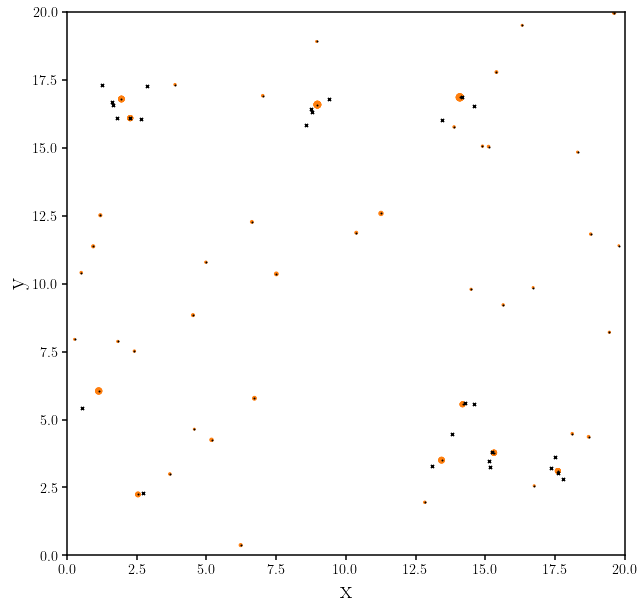

In [6]:
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)
sub.scatter(catalog[:,3], catalog[:,4], s=catalog[:,-1]/1e13, c='C1')

centrals = (catalog[:,6] == 0)
satellites = (catalog[:,6] == 1)
sub.scatter(catalog[:,0][centrals], catalog[:,1][centrals], s=1, c='k')
sub.scatter(catalog[:,0][satellites], catalog[:,1][satellites], s=10, c='k', marker='x')
sub.set_xlabel('x', fontsize=25)
sub.set_xlim(0., 20)
sub.set_ylabel('y', fontsize=25)
sub.set_ylim(0., 20)